Heart  Disease Prediction

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#loading the csv datta to a pandas dataframe
heart_data = pd.read_csv("/content/cardiodiseases.csv", delimiter=";")

In [4]:
#print first 5 rows of the dataset
heart_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#print last 5 rows of the dataset
heart_data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
#a number of rows and columns in the dataset
heart_data.shape

(70000, 13)

In [7]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
#checking the missing values
heart_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
#statistical measures about the data
pd.set_option('display.float_format',lambda X : '%.3f'% X)
heart_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000,70000.000
mean,49972.420,19468.866,1.350,164.359,74.206,128.817,96.630,1.367,1.226,0.088,0.054,0.804,0.500
std,28851.302,2467.252,0.477,8.210,14.396,154.011,188.473,0.680,0.572,0.283,0.226,0.397,0.500
min,0.000,10798.000,1.000,55.000,10.000,-150.000,-70.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,25006.750,17664.000,1.000,159.000,65.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,50001.500,19703.000,1.000,165.000,72.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,74889.250,21327.000,2.000,170.000,82.000,140.000,90.000,2.000,1.000,0.000,0.000,1.000,1.000
max,99999.000,23713.000,2.000,250.000,200.000,16020.000,11000.000,3.000,3.000,1.000,1.000,1.000,1.000


In [10]:
X = heart_data.drop('cardio', axis=1)
Y = heart_data['cardio']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print (X.shape,X_train.shape,X_test.shape)

(70000, 12) (56000, 12) (14000, 12)


In [11]:
# Initialize models
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

In [14]:
from sklearn.metrics import classification_report

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, Y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(Y_test, svm_preds)
print("Accuracy of SVM: {:.2f}".format(svm_accuracy))

# Print classification report
print("\nClassification Report for SVM:")
print(classification_report(Y_test, svm_preds))

Accuracy of SVM: 0.60

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      7004
           1       0.59      0.66      0.62      6996

    accuracy                           0.60     14000
   macro avg       0.60      0.60      0.59     14000
weighted avg       0.60      0.60      0.59     14000



In [15]:
#Train models
svm_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)
dt_model.fit(X_train, Y_train)
lr_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [16]:
# Predictions
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [17]:
# Accuracy scores
svm_accuracy = accuracy_score(Y_test, svm_preds)
knn_accuracy = accuracy_score(Y_test, knn_preds)
dt_accuracy = accuracy_score(Y_test, dt_preds)
lr_accuracy = accuracy_score(Y_test, lr_preds)
rf_accuracy = accuracy_score(Y_test, rf_preds)

In [19]:
# Print accuracy scores
print("Accuracy of SVM: {:.2f}".format(svm_accuracy))
print("Accuracy of KNN: {:.2f}".format(knn_accuracy))
print("Accuracy of Decision Tree: {:.2f}".format(dt_accuracy))
print("Accuracy of Logistic Regression: {:.2f}".format(lr_accuracy))
print("Accuracy of Random Forest: {:.2f}".format(rf_accuracy))

Accuracy of SVM: 0.60
Accuracy of KNN: 0.56
Accuracy of Decision Tree: 0.64
Accuracy of Logistic Regression: 0.69
Accuracy of Random Forest: 0.73


In [21]:
model=LogisticRegression()
#training the logistic regression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

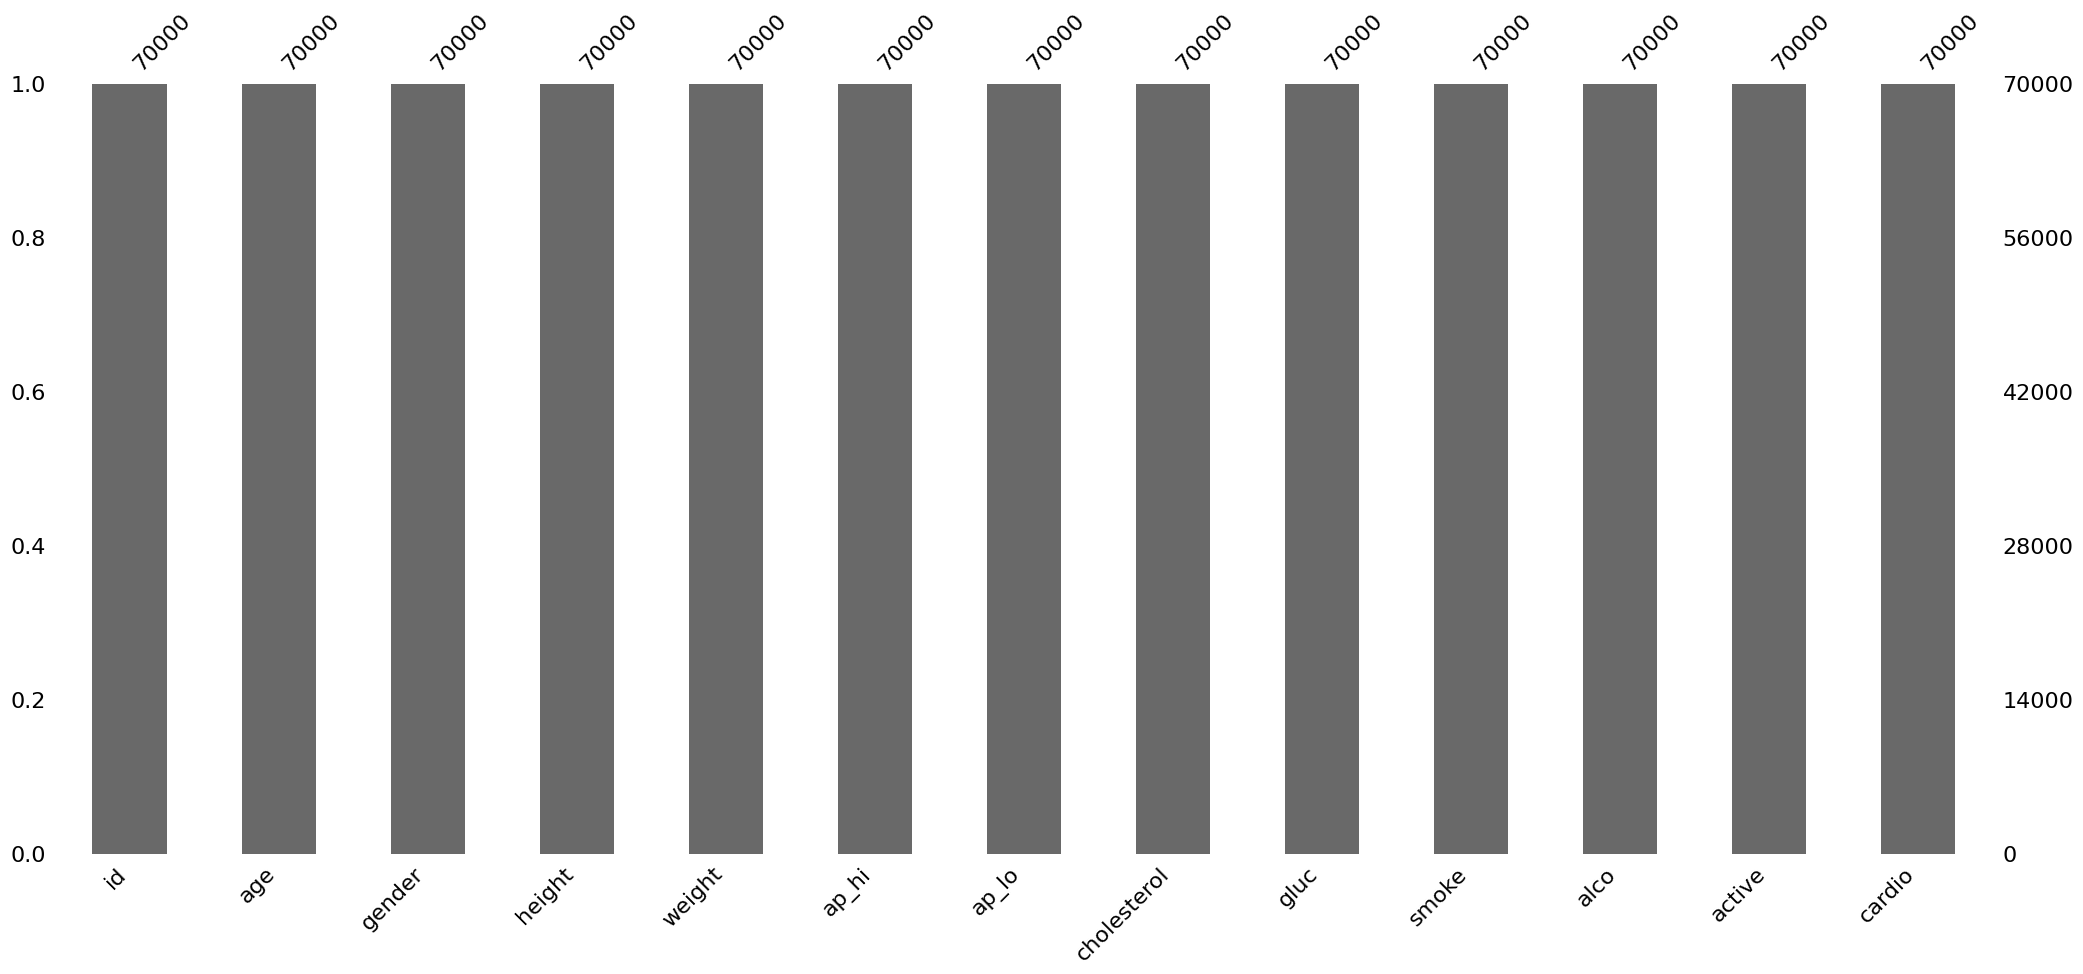

In [32]:
import missingno as msno
msno.bar(heart_data)
plt.show()

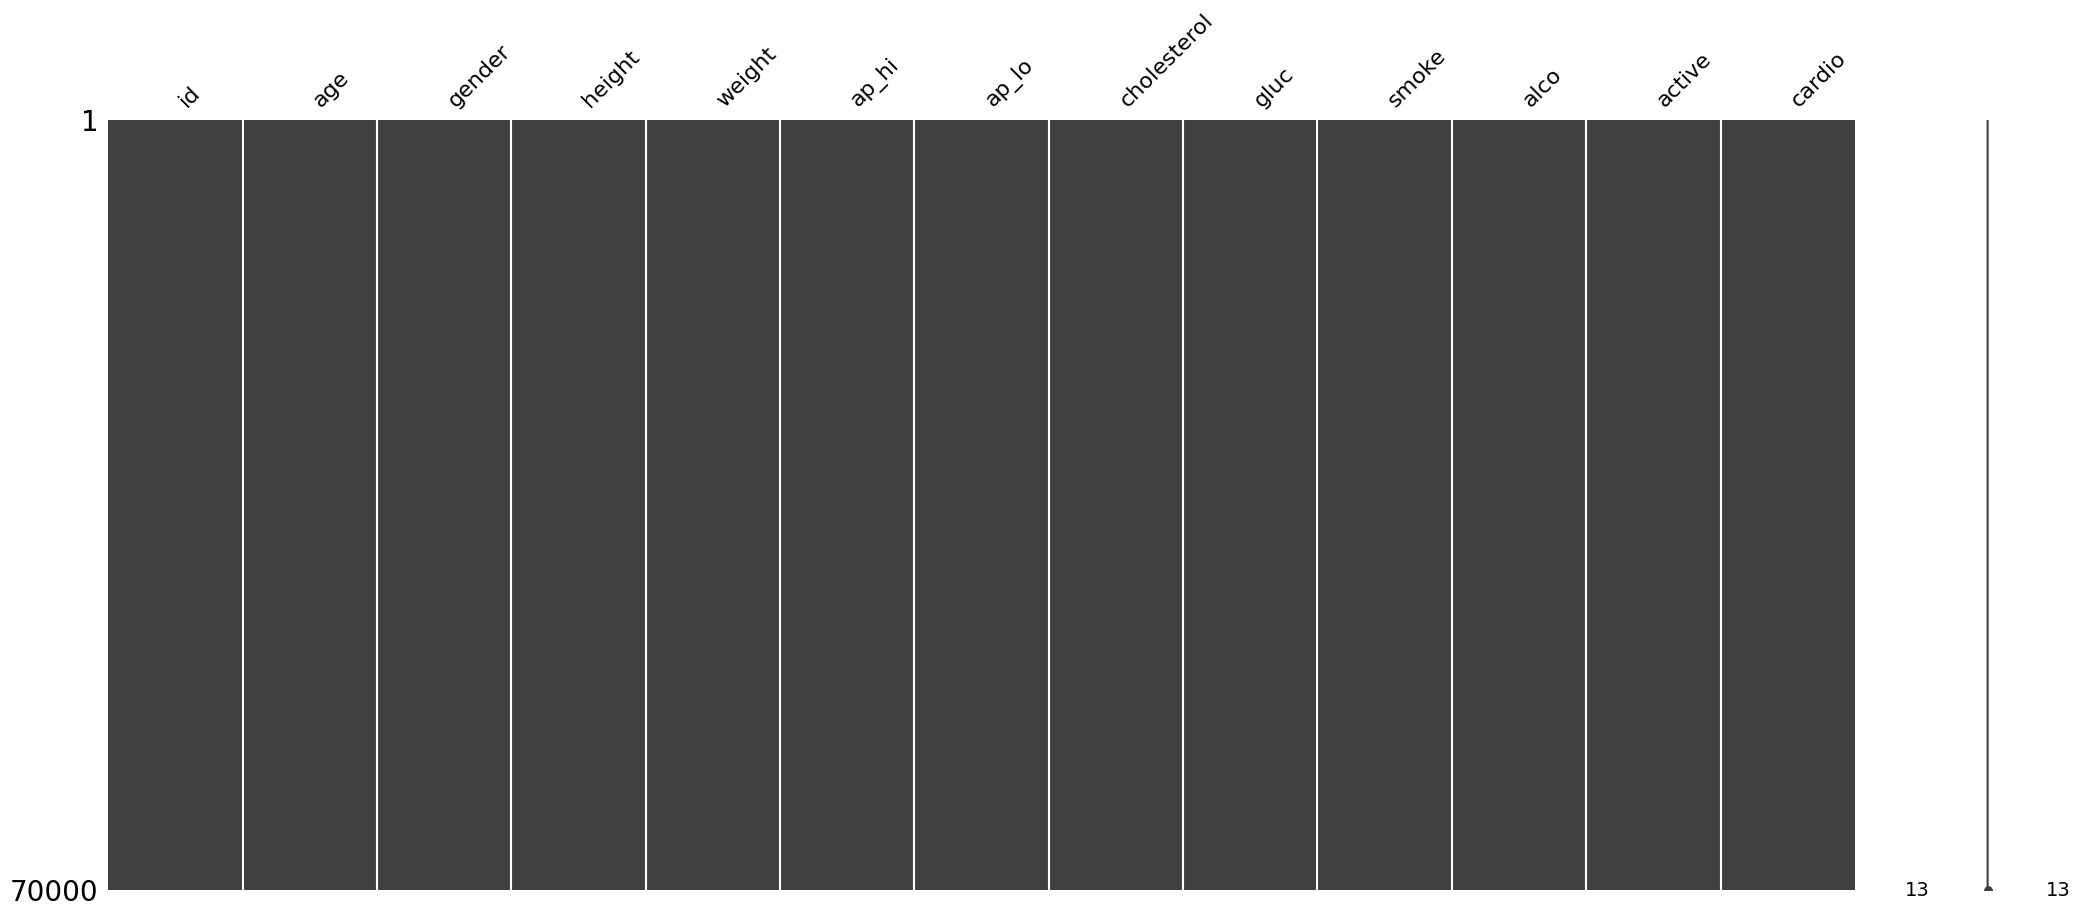

In [33]:
msno.matrix(heart_data)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


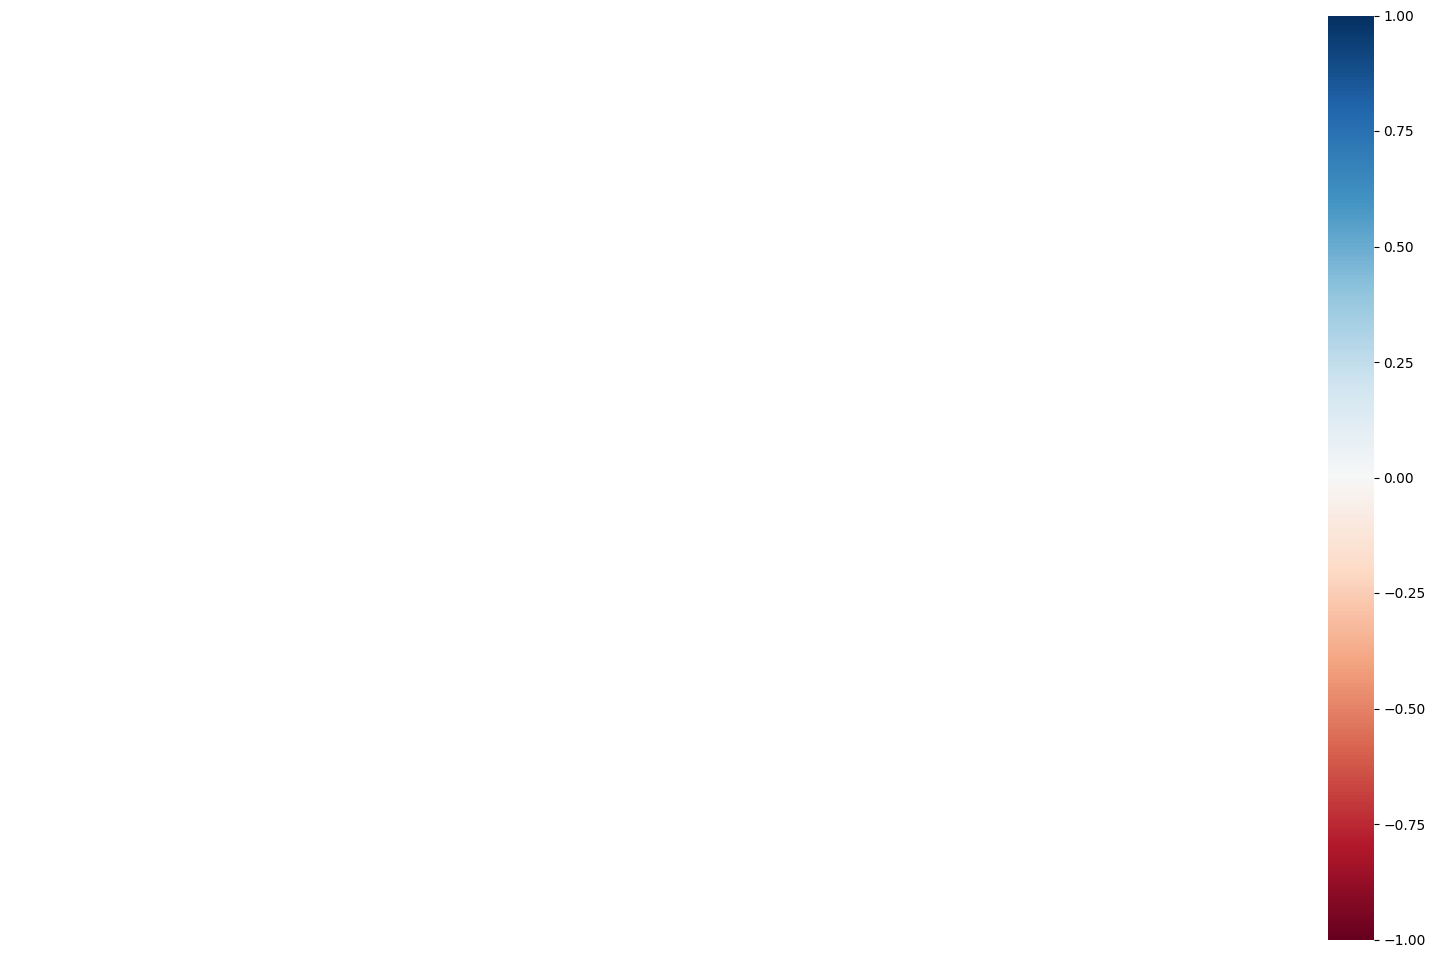

In [34]:
msno.heatmap(heart_data)
plt.show()

In [35]:
heart_data['gluc'].unique()

array([1, 2, 3])

In [37]:
heart_data['cardio'].value_counts(normalize=True)

cardio
0   0.500
1   0.500
Name: proportion, dtype: float64

In [39]:
pd.get_dummies(heart_data['gluc'])

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
69995,True,False,False
69996,False,True,False
69997,True,False,False
69998,False,True,False


In [42]:
heart_data['age']=heart_data['age'].replace(['26-40','41-50','>70','<25'],['young_adults','adults','old','youth'])
print(heart_data['age'])

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64


<Axes: xlabel='age'>

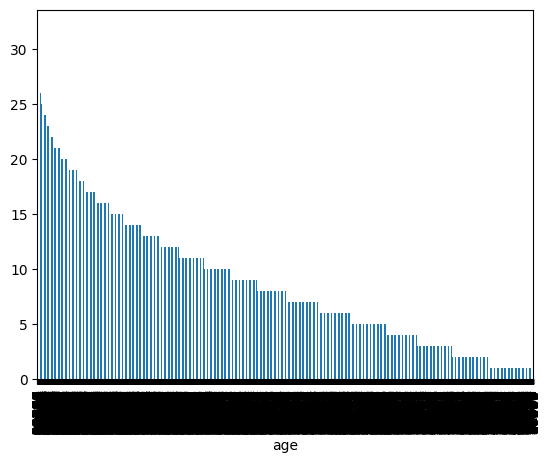

In [43]:
heart_data['age'].value_counts().plot(kind='bar')

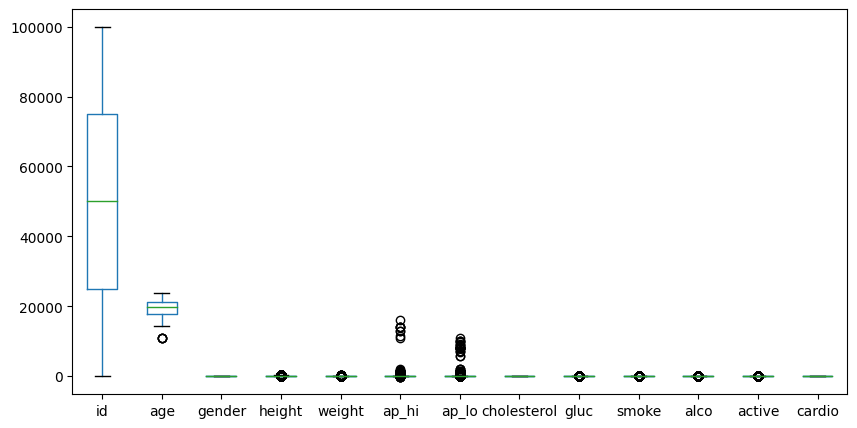

In [53]:
plt.figure(figsize=(10,5))
heart_data.boxplot(grid=False)
plt.show()

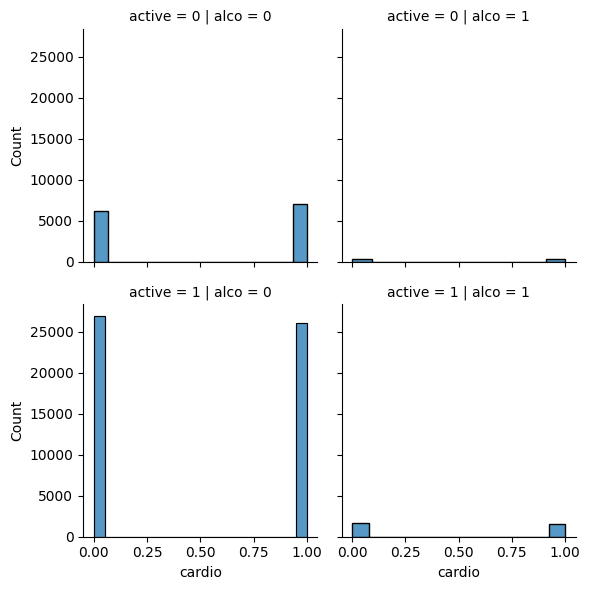

In [54]:
g=sns.FacetGrid(heart_data,row='active',col='alco')
g .map(sns.histplot,"cardio")
plt.show()

In [3]:
import joblib

# Save the trained logistic regression model
joblib.dump(model, 'cardio_model.pkl')


['cardio_model.pkl']